## Imbalanced data in practice

Imbalanced data is a term used to characterise certain types of datasets and represents a critical challenge associated with classification problems. It can be found in a myriad of applications including finance, healthcare, and public sectors. While no rigorous definition exists, it refers to a scenario where the number of samples associated with each class is highly variable. Let’s consider the following example:

### Example

You are a bank employee responsible for detecting the validity of credit card transactions. To do so, you have a training set of previously observed transactions, each of which was either:

- a) Normal
- b) Fraudulent

Most transactions are normal and it is not unlikely that fraudulent account for less than 0.1% of the total transactions! Creating a model for this task can be tricky – considering only performance as given by an accuracy score, then a model always predicting “regular” will have a really high performance value!

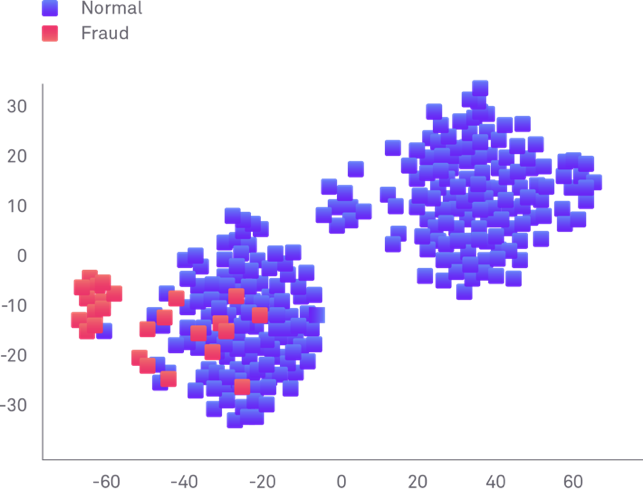

Figure 1 is a simple example that illustrates a standard imbalanced data scenario – fundamentally, the sparsity posed by the lowest sampled classes are very easy to ignore for any model! Not only this, but representative features for these classes are also harder to identify, and we expand on this in the next section.

## Three challenges with imbalanced data

**To understand the challenges associated with imbalanced data, we first introduce some notations:**

    The majority class is the class with the highest number of samples;
    The minority class is the class with the lowest number of samples;
    The class ratio for a given dataset is defined as the ratio between the size of the minority class and the size of the majority class. Empirically, data ratios of at least 25% do not affect performance by large margins. This is no longer true, however, as the ratio becomes smaller.

**Challenges rising from datasets with very small class ratios appear on 3 distinct fronts:**

    modelling and learning feature correlation properties for lower sampled classes;
    detecting relevant feature class separation, i.e. identification of relevant features unique to each class;
    addition of large bias to “standard” evaluation metrics which are generally designed for similar class sizes.

**These issues could be mitigated at one of the following:**

    Model-level: Models can be modified to introduce heavier weighting to smaller representative classes, penalising more heavily errors in training prediction;
    Evaluation-level: Alternative evaluation metrics must be used to account for class balance – note that this solves only the problem of performance evaluation, it does not actually lead to better model classification.
    Data-level: Alternatively, the data itself can be transformed! If done in a smart way, new instances can be introduced in such a way to allow models to better model these classes. These methods fall under the name of data samplers, and are the topic of discussion for the next section.

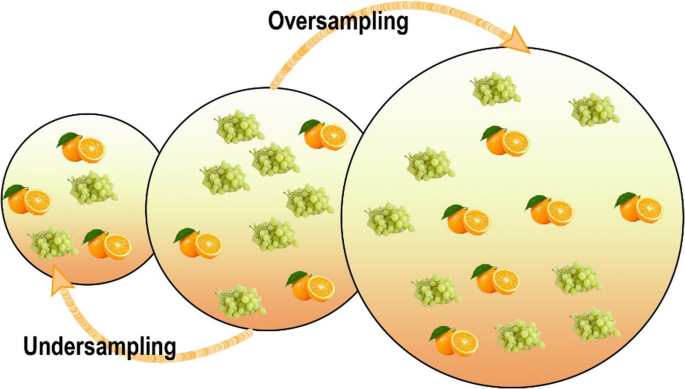

## Best data sampling techniques to handle imbalanced data

In this section, we go through the most common data sampling methods. Data sampling refers to the class of algorithms that transforms a dataset (with regards to instances, not features) – code implementation of these algorithms is at the bottom of this article. We consider the same input dataset as part of this method comparison.

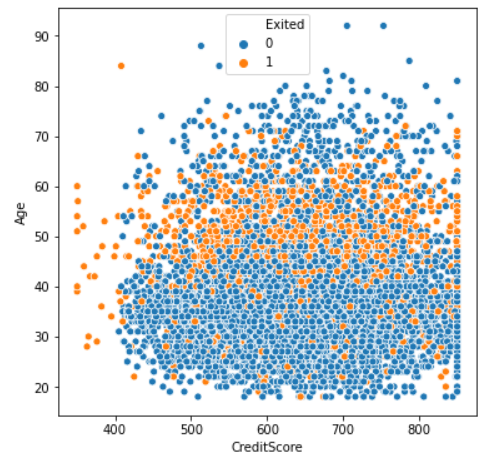

#### 1. Random Under-Sampler (RU)

Arguably the most common sampling approach, the Random Under-Sampler performs a downsampling of the larger classes in the simplest way possible – randomly selecting available instances from each class. The number of instances sampled is defined as part of an acceptable class balance threshold and is therefore variable.

In general, RU ensures no data is artificially generated and all resulting data is a subset of the original input dataset. Nevertheless, for high degrees of imbalance, this usually leads to a great loss in available training data, and ultimately leads to reduced model performance.


#### 2. Random Over-Sampler (RO)

An alternative to RU, the Random Over-Sampler algorithm follows a similar technique in the opposite direction – as opposed to downsampling larger classes, smaller classes are oversampled until the class sizes are balanced. With oversampling, instances can (and do) appear multiple times.

RO solves the problem of data deletion (unlike the case of RU). Nevertheless, it introduces another bias in that samples are now repeated in the dataset. The effects caused by this is a bias towards focusing on the precise feature values of the repeated samples, as opposed to finding relevant separating regions and boundaries.

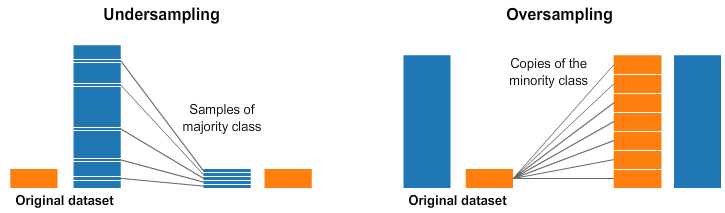

#### 3. Synthetic Minority Oversampling Technique (SMOTE)

SMOTE is another algorithm to oversample smaller classes. The main idea behind SMOTE is that generated instances should be constructed from available observations, but should not be identical. SMOTE generates new instances of a minority class according to the following algorithm:

Borderline areas are approximated by support vectors after training a SVM classifier on the original training data set. Once computed, samples are synthesised next to the approximated boundary.

1. Select a random pair of points from the same minority class, x_i, and x_j, where the latter is sampled from the k- neighbours of x_i.
2. Sample uniformly a value t from a uniform distribution (U[0, 1]).
3. Generate a new instance x = t * x_i + (1-t) * x_j.
4. Repeat until number of samples is enough according to the oversampling ratio threshold (hyper-parameter).

SMOTE has shown widespread use and great success in various applications and tasks. It remains one of the most common oversampling mechanisms, and has led to a large family of variants, each with its own unique strong points and drawbacks. Ultimately, however, no variant of SMOTE has consistently been shown to improve on its power and performance.